# Volume 24

### Análise de dados

In [3]:
import pandas as pd
import yfinance as yf

In [4]:
inicio = "2017-01-01"
final = "2022-08-31"

dados_weg = yf.download("WEGE3.SA", inicio, final)['Close']

dados_weg

/tmp/ipykernel_110884/1947161746.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados_weg = yf.download("WEGE3.SA", inicio, final)['Close']
[*********************100%***********************]  1 of 1 completed

Ticker,WEGE3.SA
Date,
2017-01-02,5.043102
2017-01-03,5.296929
2017-01-04,5.170017
2017-01-05,5.156656
2017-01-06,5.200074
...,...
2022-08-24,27.255991
2022-08-25,27.407465
2022-08-26,27.274920


In [5]:
#retorno diário 

dados_weg.pct_change()

Ticker,WEGE3.SA
Date,
2017-01-02,NaN
2017-01-03,0.050332
2017-01-04,-0.023960
2017-01-05,-0.002584
2017-01-06,0.008420
...,...
2022-08-24,-0.000347
2022-08-25,0.005557
2022-08-26,-0.004836


In [6]:
#retorno_anual

dados_weg.resample("Y").last().pct_change().dropna()

/tmp/ipykernel_110884/427336542.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dados_weg.resample("Y").last().pct_change().dropna()


Ticker,WEGE3.SA
Date,
2018-12-31,-0.037392
2019-12-31,1.007021
2020-12-31,1.202822
2021-12-31,-0.119122
2022-12-31,-0.126355


In [7]:
#janela de retorno de 36 meses

dias = 252 

dados_36m = dados_weg.pct_change(periods = dias).dropna()

dados_36m

Ticker,WEGE3.SA
Date,
2017-12-28,0.627257
2017-12-29,0.549279
2018-01-02,0.647222
2018-01-03,0.626407
2018-01-04,0.597117
...,...
2022-08-24,-0.186763
2022-08-25,-0.176982
2022-08-26,-0.178895


<Axes: xlabel='Date'>

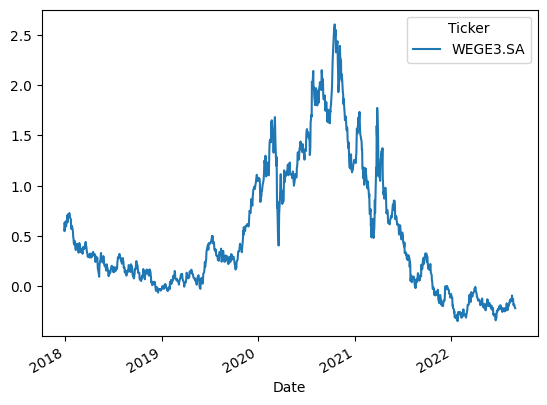

In [8]:
dados_36m.plot()

In [9]:
dados_mercado = yf.download(["^BVSP", "WEGE3.SA"], inicio, final)['Close']
dados_mercado

/tmp/ipykernel_110884/2041008986.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados_mercado = yf.download(["^BVSP", "WEGE3.SA"], inicio, final)['Close']
[*********************100%***********************]  2 of 2 completed


KeyError: 'Close'

In [ ]:
dados_36m = dados_mercado.pct_change(periods = dias).dropna()

dados_36m

,WEGE3.SA,^BVSP
Date,,
2017-12-28,0.627257,0.282149
2017-12-29,0.549280,0.235998
2018-01-02,0.647222,0.264690
2018-01-03,0.626407,0.256545
2018-01-04,0.597118,0.275391
...,...,...
2022-08-24,-0.186763,-0.043667
2022-08-25,-0.176982,-0.033540
2022-08-26,-0.178895,-0.065818


<AxesSubplot: xlabel='Date'>

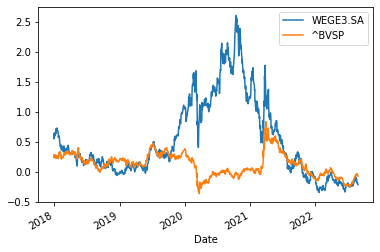

In [ ]:
dados_36m.plot()

# Exercícios

* Exercício 79: Puxe as cotações de uma empresa a sua escolha e calcule o retorno diário e o retorno anual.
* Exercício 80: Compare as janelas de 12 meses de retorno de uma empresa escolhida pelo usuário com as janelas de 12 meses de retorno do ibovespa. 

In [ ]:
#Gabrito 79

dados_acao = yf.download("LREN3.SA", inicio, final)['Close']

retornos_diarios = dados_acao.pct_change().dropna()
retornos_anuais = dados_acao.resample("Y").last().pct_change().dropna()

retornos_anuais

[*********************100%***********************]  1 of 1 completed


Date
2018-12-31    0.209546
2019-12-31    0.484967
2020-12-31   -0.211190
2021-12-31   -0.425802
2022-12-31    0.135424
Freq: A-DEC, Name: Close, dtype: float64

[*********************100%***********************]  2 of 2 completed


<AxesSubplot: xlabel='Date'>

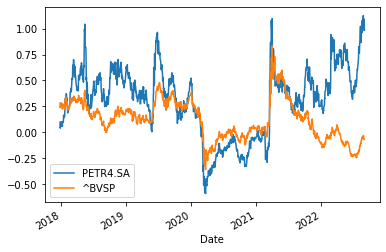

In [ ]:
#gabarito 80 

empresa = input("Qual empresa você quer analisar: ")

empresa = empresa + ".SA"

dados_mercado = yf.download(["^BVSP", empresa], inicio, final)['Close']

retornos_12m = dados_mercado.pct_change(periods = 252).dropna()
retornos_12m.plot()

# Volume 25

Agora que você já calculou os retornos, como você pode calcular médias móveis no Pandas?